<a href="https://colab.research.google.com/github/ayushpatel2809/FUTURE_ML_01/blob/main/sales_forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload your sales_data.csv file:


Saving sales_data.csv to sales_data.csv
Original Data:
         Date  Sales
0  2023-01-01    100
1  2023-01-02    105
2  2023-01-03    110
3  2023-01-04    115
4  2023-01-05    120

--- Daily Forecast ---


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp83q9z8fz/jo3bxsbb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp83q9z8fz/bgxq6jdf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57954', 'data', 'file=/tmp/tmp83q9z8fz/jo3bxsbb.json', 'init=/tmp/tmp83q9z8fz/bgxq6jdf.json', 'output', 'file=/tmp/tmp83q9z8fz/prophet_modelno_1ix2d/prophet_model-20250518122800.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:28:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:28:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


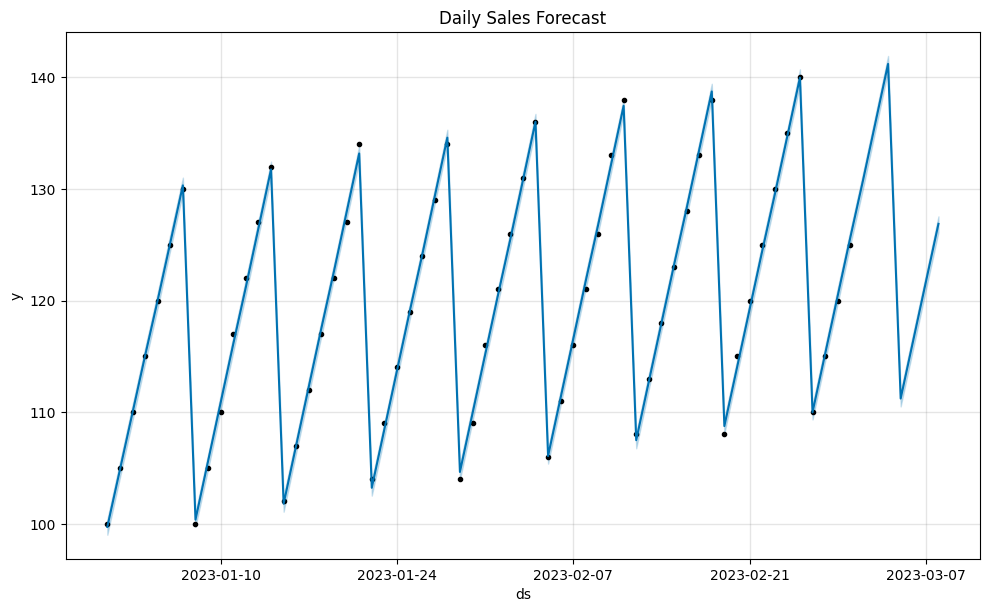

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp83q9z8fz/8qv6rrjh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp83q9z8fz/50yanko8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44980', 'data', 'file=/tmp/tmp83q9z8fz/8qv6rrjh.json', 'init=/tmp/tmp83q9z8fz/50yanko8.json', 'output', 'file=/tmp/tmp83q9z8fz/prophet_modellpnqfn7n/prophet_model-20250518122801.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:28:01 - cmdstanpy - INFO - Chain [1] start processing
IN


--- Weekly Forecast ---


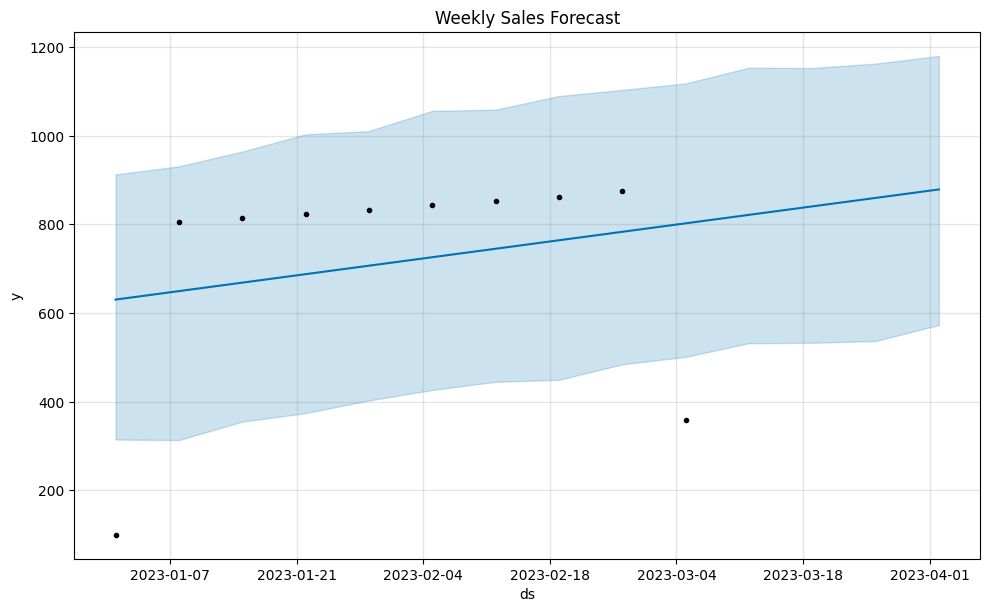

<ipython-input-1-5944a7a3fe2b>:55: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = monthly_df.set_index('ds').resample('M').sum().reset_index()
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 1.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp83q9z8fz/f18f82_m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp83q9z8fz/5cqjlzb6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43254', 'data', 'file=/tmp/tmp83q9z8fz/f18f82_m.json', 'init=/tmp/tmp83q9z8fz/5cqjlzb6


--- Monthly Forecast ---


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


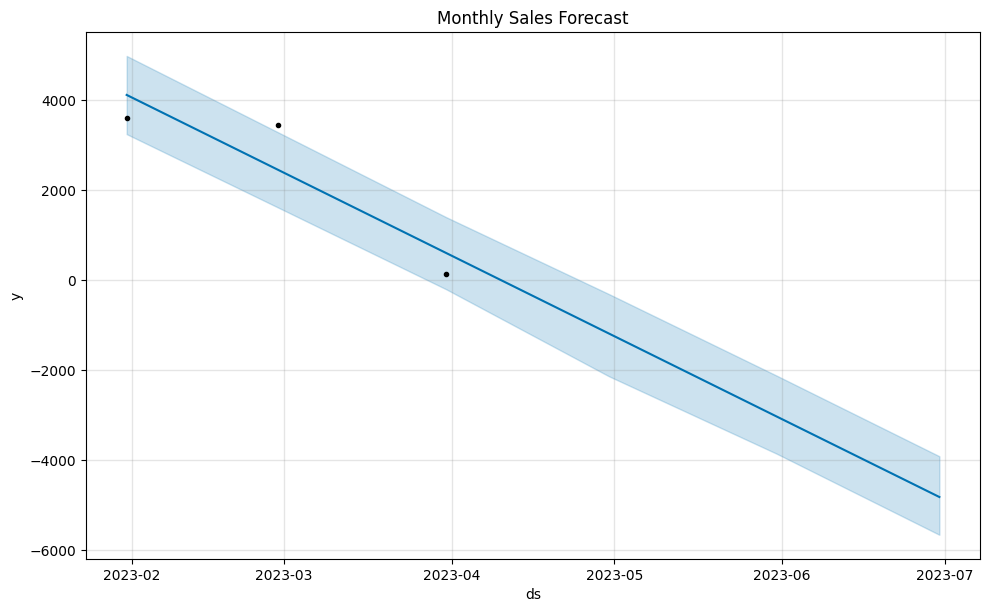

In [ ]:
from google.colab import files
import pandas as pd

print("Upload your sales_data.csv file:")
uploaded = files.upload()

df = pd.read_csv("sales_data.csv")
print("Original Data:")
print(df.head())

df['Date'] = pd.to_datetime(df['Date'])
df = df.rename(columns={'Date': 'ds', 'Sales': 'y'})

!pip install prophet

from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Daily Forecast ---")
daily_model = Prophet()
daily_model.fit(df)
future_daily = daily_model.make_future_dataframe(periods=7)  # 7 days ahead
forecast_daily = daily_model.predict(future_daily)

fig1 = daily_model.plot(forecast_daily)
plt.title("Daily Sales Forecast")
plt.show()

print("\n--- Weekly Forecast ---")
weekly_df = df.copy()
weekly_df = weekly_df.set_index('ds').resample('W').sum().reset_index()

weekly_model = Prophet()
weekly_model.fit(weekly_df)
future_week = weekly_model.make_future_dataframe(periods=4, freq='W')  # 4 weeks ahead
forecast_week = weekly_model.predict(future_week)

fig2 = weekly_model.plot(forecast_week)
plt.title("Weekly Sales Forecast")
plt.show()

print("\n--- Monthly Forecast ---")
monthly_df = df.copy()
monthly_df = monthly_df.set_index('ds').resample('M').sum().reset_index()

monthly_model = Prophet()
monthly_model.fit(monthly_df)
future_month = monthly_model.make_future_dataframe(periods=3, freq='M')  # 3 months ahead
forecast_month = monthly_model.predict(future_month)

fig3 = monthly_model.plot(forecast_month)
plt.title("Monthly Sales Forecast")
plt.show()